## Exploratory Data Analysis (EDA)

This notebook explores the credit card transactions dataset to understand
its structure, feature distributions, and class imbalance before any
preprocessing or model training.


In [1]:
import sys
sys.path.append('../src')

import pandas as pd
from loader import load_data


### Dataset Loading and Preview

The dataset is loaded and a preview of the first few rows is displayed to
understand the structure and available features.


In [2]:
df = load_data('../data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Structure and Data Types

This step examines the dataset size, feature data types, and checks for
missing values to assess data quality.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observation:
The dataset is highly imbalanced, with fraudulent transactions representing a very small fraction of the total data.

This imbalance makes accuracy an unreliable evaluation metric and necessitates the use of recall, precision, and F1-score.


Only about 0.17% of the transactions are fraudulent, confirming extreme class imbalance.


### Class Distribution

This plot highlights the severe class imbalance in the dataset, where
fraudulent transactions represent only a very small fraction of the total
transactions.


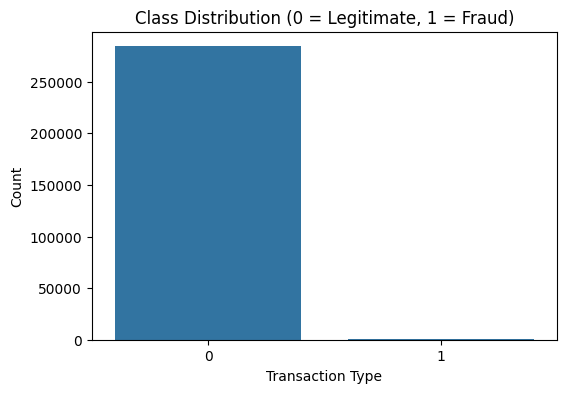

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legitimate, 1 = Fraud)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


### Fraud Transaction Percentage

This calculation quantifies the proportion of fraudulent transactions in the
dataset, highlighting the extreme class imbalance problem.


In [5]:
fraud_percentage = (df['Class'].value_counts()[1] / len(df)) * 100
fraud_percentage

np.float64(0.1727485630620034)

### Transaction Amount Distribution

This plot shows the distribution of transaction amounts. The presence of
long tails and outliers motivates the use of robust scaling techniques
during preprocessing.


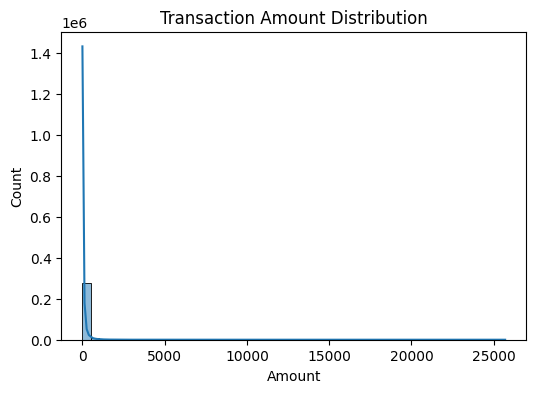

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


## Key Observations from Exploratory Data Analysis

- The dataset contains a large number of transactions with **no missing values**.
- Fraudulent transactions account for **less than 1%** of the total data, indicating
  a severe class imbalance problem.
- Transaction amounts are **highly skewed** with noticeable outliers.
- Most features are anonymized (PCA-transformed), requiring careful model selection
  and evaluation strategies.

These observations motivate the use of stratified splitting, robust feature scaling,
cost-sensitive learning, and threshold optimization in subsequent modeling stages.
